In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

For our study we formed two data frames. The first one is <b>persons.csv</b>, which contains data about articles on persons created on wikipedia from 2003 to 2013 (other years have rather insufficient data in order to be taken into consideration). The original datadump didn't contain the article's unique ID or its creation date and since we needed these attributes for our research we decided to crawl all the records in order to add them. There was another approach to this end, namely to collect various wikipedia datadumps where we could find such attributes but despite our efforts we weren't able to get anything useful, which is why we went for the crawling approach. The second one is <b>nominated.csv</b>, which contains data about articles on persons which were nominated for deletion in wikipedia but which weren't deleted. This dataset spans from 2005-2013. We decided not to crawl 2003 and 2004 because there were insufficient data on these years (the idea of nomination for deletion started on 2003). <br>
Thus our research investigates years 2005-2013.

# Working on data

In [2]:
person = pd.read_csv('persons.csv')
person.sample(100)

,uri,gender,Id,CreationDate
578745,http://dbpedia.org/resource/Donald_MacDonald_(...,male,22582504,January 2015
213229,http://dbpedia.org/resource/Jeff_Huson,male,4870625,April 2006
590306,http://dbpedia.org/resource/%C3%81ngel_Rojas,male,23123664,June 2009
751998,http://dbpedia.org/resource/David_Beamish,male,32331241,July 2011
342186,http://dbpedia.org/resource/Irene_Marot,female,10426406,April 2007
349588,http://dbpedia.org/resource/Jyrki_Ponsiluoma,male,10703037,April 2007
391416,http://dbpedia.org/resource/Roderick_Ross,male,12444401,July 2007
639568,http://dbpedia.org/resource/Tom_Prydie,male,25855930,January 2010
684183,http://dbpedia.org/resource/Jill_Adams_(artist),female,28075670,July 2010
162669,http://dbpedia.org/resource/Bruno_Schweizer,male,3304873,December 2005


In [3]:
nominated = pd.read_csv('nominated.csv')
nominated.sample(100)

,Year,Month,Tile,Id,Gender
23827,2012,December,Sarah Oppenheimer,37926904,female
18191,2010,August,Dale Peterson,31331652,male
14204,2009,September,Steve McLendon,28872646,male
27331,2013,August,Michael Grunwald,40282622,male
26751,2013,November,Al (Allen) Schwartz,39836423,male
24057,2012,November,Sophia Forero,699132,female
5606,2007,December,Charice Pempengco,14382613,female
4616,2006,April,Mirela Roznoveanu,3472656,female
23400,2011,January,JD Foster,42073493,male
15562,2009,May,Patrick Ada,23912261,male


In [4]:
nominated.columns = ['NominatedYear', 'NominatedMonth', 'NominatedTitle', 'NominatedId', 'NominatedGender']

- Split the CreationDate field of the persons dataFrame into a year and a month

In [5]:
person['month'], person['year'] = person['CreationDate'].str.split(' ').str

In [6]:
person = person.drop(['CreationDate'], axis = 1)

- Drop records which couldn't be crawled

In [7]:
person = person.drop(person[person.Id == ' '].index)
person[person.Id == ' '].shape[0]

0

- Parse the Id field of createdAtYear to a numeric value

In [8]:
person.Id = pd.to_numeric(person.Id)
person.Id.dtype

dtype('float64')

- Finally, join the two datasets under one single dataset

In [9]:
result = pd.merge(nominated, person, left_on='NominatedId', right_on='Id', how = 'inner')

In [10]:
# Drop redundant columns
result = result.drop(['NominatedId', 'NominatedGender', 'uri', 'NominatedTitle'], axis = 1)

# Convert the year to an integer
result.year = pd.to_numeric(result.year)
result.sample(100)

,NominatedYear,NominatedMonth,gender,Id,month,year
10247,2008,May,male,17502368.0,May,2008
13058,2009,June,male,457180.0,February,2004
15558,2010,August,female,13692588.0,February,2019
9675,2008,July,male,2893413.0,October,2005
20943,2012,March,female,2059684.0,June,2005
12666,2009,August,male,23915585.0,August,2009
22624,2013,January,male,38262691.0,January,2013
20620,2012,May,male,35748371.0,May,2012
4360,2006,April,female,4898125.0,April,2006
12598,2009,August,male,13669384.0,October,2007


In [11]:
result.shape[0]

22788

# As discussed on presentation day, we are looking at our research based on 3 special cases. 

# Disregarding special cases

In [12]:
resultWsc = result[result.year == result.NominatedYear]
print("Amount of data without special cases compared to the original amount", resultWsc.shape[0]*100 / result.shape[0], "%")

Amount of data without special cases compared to the original amount 35.93558012989293 %


In [13]:
years = ['2005','2006', '2007','2008', '2009', '2010', '2011', '2012', '2013']
nominatedMen = []
nominatedWomen = []

for year in years:
    # How many articles of the respective genders were created at the respective year
    yearXM = person[(person.year == year) & (person.gender == 'male')].shape[0]
    yearXF = person[(person.year == year) & (person.gender == 'female')].shape[0]
    # How many articles of the respective genders were nominated for deletion at the respective year
    nominatedM = resultWsc[(resultWsc.NominatedYear == int(year)) & (resultWsc.gender == 'male')].shape[0]
    nominatedF = resultWsc[(resultWsc.NominatedYear == int(year)) & (resultWsc.gender == 'female')].shape[0]
    
    nominatedMen.append(nominatedM*100/yearXM)
    nominatedWomen.append(nominatedF*100/yearXF)

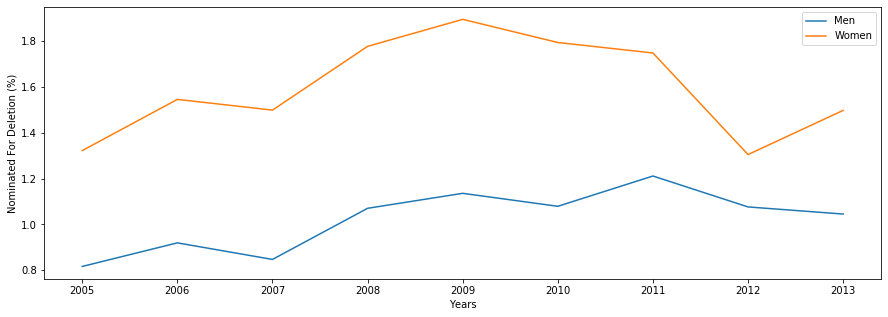

In [16]:
plt.plot(years, nominatedMen, label = 'Men')
plt.plot(years, nominatedWomen, label = 'Women')
plt.xlabel('Years')
plt.ylabel('Nominated For Deletion (%)')
plt.legend()

# Considering special cases

Special cases: <br>
<ol>
    <li><b>NominatedDate (year) - CreatedDate (year) > 2</b> </li>
        In about 20% of the articles the distance between the created year and the nominated for deletion year is greater than 2. These articles will be counted as if they were created on the year when they were nominated for deletion as long as the created year is less than or equal to 2007. The reason is that articles created in the first years of wikipedia are often consisting of just one paragraph or even a 2-3 sentences in their first form and they are changing a lot overtime so that in the context of our research, the article literally is not the same as the first verison of it or even the first couple versions of it. Morover something substantial must have changed if it was nominated for deletion 3 or 4 years later. 
<b>Example:</b>
    The article for Carolyn Bessette-Kennedy was first created in 2003 and it consisted of just a small paragraph. At 2009, the year when it was nominated for deletion, we almost have a full-fledged article so that, in the context of our research we can't just ignore this article because it was created in 2003. Hence we are saying that the article has substantially changed since 2003 and calculating it as an article created in 2009 (another question is: why 2009 and not 2008? We chose 2009 first of all because of the simplicity of calculation and then because, again if it was nominated in 2009 then some substantional change must have happened on 2009. A better approach would have been to thoroughly study the "View history" of the article which is containing a history of all changes).
    <li><b>CreationDate (year) > NominationDate(year)</b></li>
    For some articles we observe an interesting phenomenon, namely that the creation year is greater than the year in which the article was nominated for deletion. This does not make sense on a first look but what is rather happening is, that after the article survives one nomination for deletion, its getting deleted at some other point in time. This accounts for about 15% of the articles.
    <b>Example: </b> The article on Travis D'Arnaud was nominated for deletion on December 2009 but it was created on april 2010. What has happened in between is that after surviving the nomination of December 2009 this article was probably nominated again for deletion and this time it was deleted (our crawler is only crawling articles that got nominated for deletion and stayed so that we can't really see this for all articles). Then it was created again in April 2010 with the exact same name and id as before. Hence the discrepancy. But because this accounts for 20% of the articles and we didn't want to just throw them away we decided to count the creation date the same as the nominated for deletion date. In this case we count the creation date to be 2009. We chose it this way because most of articles are getting nominated for deletion on the same year that they were created, which makes sense (the wikipedia community is continually scouting the new articles created and it is unlikely for a whole year to pass by without an article being noticed). A better approach on this point would have been to decide the created year based on some random probability distribution which is conforting to the general tendency of articles flagged for deletion on the same year they get created (so maybe after studying this tendency we come up at the conclusion that an article gets flagged for deletion on the same year he was created with a prob of 0.7).
    <li><b>The nominated and creation year differ by one and the months differ by 6.</b></li>
    This accounts for only 2.5% of the articles, namely the article gets created on the last 3 months of a year (December, November, October) and then it gets nominated for deletion somewhere between the first 3 months of the next year (january, februar, march). The time span is very rarely 6 months, mostly it is lower than or equal to 3.<b>Example: </b> The article of Kendra Morris was created on December 2008 but was nominated for deletion on January 2009. We count it as an article nominated for deletion in 2008 to account for the time discrepancy.
</ol>

In [17]:
# Account for special case no.1
indexes = result[(result.NominatedYear - result.year > 2) & (result.year < 2008)].index
indexes

Int64Index([   13,    14,    21,    23,    24,    43,    49,    50,    58,
               59,
            ...
            22762, 22764, 22767, 22769, 22771, 22772, 22774, 22780, 22782,
            22783],
           dtype='int64', length=4887)

In [18]:
result.iloc[indexes]

,NominatedYear,NominatedMonth,gender,Id,month,year
13,2007,August,male,433349.0,January,2004
14,2010,February,male,433349.0,January,2004
21,2010,May,male,3553850.0,December,2005
23,2009,March,male,21866874.0,September,2006
24,2009,February,male,21866874.0,September,2006
43,2009,July,male,7997210.0,November,2006
49,2007,March,male,12999995.0,May,2004
50,2010,August,male,12999995.0,May,2004
58,2008,October,male,1369237.0,January,2005
59,2008,September,male,1369237.0,January,2005


In [19]:
result.loc[indexes, 'year'] = result.loc[indexes, 'NominatedYear']

# Remove month so that they don't fall under the 3rd category later
result.loc[indexes, 'month'] = ""

In [20]:
# Account for special case no.2
indexes2 = result[result.year > result.NominatedYear].index

result.loc[indexes2, 'year'] = result.loc[indexes2, 'NominatedYear']

# Remove month so that they don't fall in the 3rd category
result.loc[indexes2, 'month'] = ""

In [21]:
result.iloc[indexes2]

,NominatedYear,NominatedMonth,gender,Id,month,year
0,2005,December,male,14556103.0,,2005
2,2005,December,male,4227450.0,,2005
16,2005,December,male,16152852.0,,2005
18,2005,December,male,5289926.0,,2005
22,2005,December,male,21866874.0,,2005
25,2005,December,male,3848767.0,,2005
37,2005,December,male,4334176.0,,2005
38,2005,December,male,25141489.0,,2005
39,2005,December,male,24621997.0,,2005
42,2005,December,male,7997210.0,,2005


In [22]:
# Accounting for special case no.3 
indexes3 = result[(result.NominatedYear - result.year == 1) & (((result.month == 'December') | (result.month == 'November') 
                                                    |(result.month == 'October')) & ((result.NominatedMonth == 'January')
                                                                                    | (result.NominatedMonth == 'February')
                                                                                    | (result.NominatedMonth == 'March')))].index

In [23]:
result.loc[indexes3, 'NominatedYear'] = result.loc[indexes3, 'year']


In [24]:
result.loc[indexes3]

,NominatedYear,NominatedMonth,gender,Id,month,year
27,2005,January,male,3557832.0,December,2005
33,2005,February,male,3510521.0,December,2005
62,2005,January,male,2907843.0,October,2005
166,2005,January,male,2951290.0,October,2005
1380,2004,February,male,1318468.0,December,2004
1381,2004,January,male,1318468.0,December,2004
1593,2004,March,male,1218816.0,November,2004
1628,2004,March,male,1272067.0,December,2004
1637,2004,March,male,1060306.0,October,2004
1640,2006,March,male,7917058.0,November,2006


# Plots

In [25]:
# Retain only record where creation date and nomination are the same (this is needed for the year by year analisys)
resultEq = (result[result.NominatedYear == result.year])
print("Amount of data without special cases compared to the original amount", resultEq.shape[0]*100 / result.shape[0], "%")

Amount of data without special cases compared to the original amount 75.57486396348956 %


In [26]:
resultEq

,NominatedYear,NominatedMonth,gender,Id,month,year
0,2005,December,male,14556103.0,,2005
2,2005,December,male,4227450.0,,2005
3,2005,December,female,3258728.0,November,2005
4,2005,December,female,3087149.0,November,2005
5,2005,December,male,3191175.0,November,2005
6,2005,December,male,1884298.0,May,2005
7,2005,December,male,3563211.0,December,2005
8,2005,December,female,2721613.0,September,2005
9,2005,December,male,3569216.0,December,2005
11,2005,December,male,2110815.0,June,2005


In [27]:
years = ['2005','2006', '2007','2008', '2009', '2010', '2011', '2012', '2013']
nominatedMen = []
nominatedWomen = []
cumulativeMen = []
cumulativeWomen = []

yearlySumM = 0
nominatedSumM = 0
yearlySumF = 0
nominatedSumF = 0
for year in years:
    # How many articles of the respective genders were created at the respective year
    yearXM = person[(person.year == year) & (person.gender == 'male')].shape[0]
    yearXF = person[(person.year == year) & (person.gender == 'female')].shape[0]
    # How many articles of the respective genders were nominated for deletion at the respective year
    nominatedM = resultEq[(resultEq.NominatedYear == int(year)) & (resultEq.gender == 'male')].shape[0]
    nominatedF = resultEq[(resultEq.NominatedYear == int(year)) & (resultEq.gender == 'female')].shape[0]
    
    nominatedMen.append(nominatedM*100/yearXM)
    nominatedWomen.append(nominatedF*100/yearXF)
    
    yearlySumM += yearXM
    yearlySumF += yearXF
    nominatedSumM += result[(result.NominatedYear == int(year)) & (result.gender == 'male')].shape[0]
    nominatedSumF += result[(result.NominatedYear == int(year)) & (result.gender == 'female')].shape[0]
    cumulativeMen.append(nominatedSumM*100/yearlySumM)
    cumulativeWomen.append(nominatedSumF*100/yearlySumF)

In [28]:
for i in range(0, len(nominatedMen)):
    print(nominatedMen[i],"% of articles about men were nominated for deletion on the year",i)
    print(nominatedWomen[i],"% of articles about women were nominated for deletion on the year",i)

1.534652806431433 % of articles about men were nominated for deletion on the year 0
1.9236149972020145 % of articles about women were nominated for deletion on the year 0
1.5733298923462615 % of articles about men were nominated for deletion on the year 1
2.3769702498606256 % of articles about women were nominated for deletion on the year 1
1.6782091153880547 % of articles about men were nominated for deletion on the year 2
2.7041908840624043 % of articles about women were nominated for deletion on the year 2
2.255892255892256 % of articles about men were nominated for deletion on the year 3
3.596920923722883 % of articles about women were nominated for deletion on the year 3
2.4853860380975523 % of articles about men were nominated for deletion on the year 4
3.951391011922959 % of articles about women were nominated for deletion on the year 4
2.8427288869712406 % of articles about men were nominated for deletion on the year 5
4.874129619710766 % of articles about women were nominated 

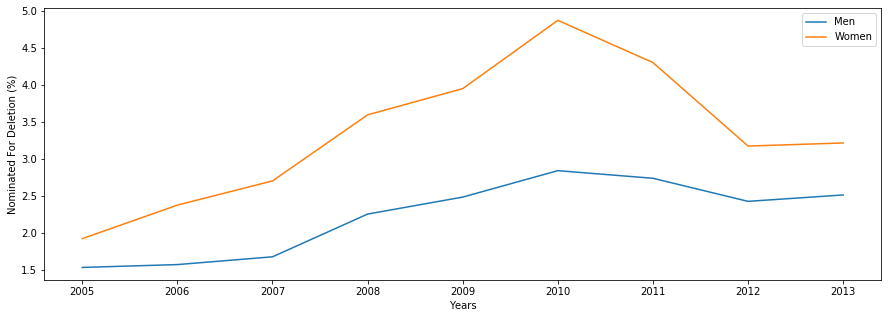

In [29]:
plt.plot(years, nominatedMen, label = 'Men')
plt.plot(years, nominatedWomen, label = 'Women')
plt.xlabel('Years')
plt.ylabel('Nominated For Deletion (%)')
plt.legend()

# Cumulative

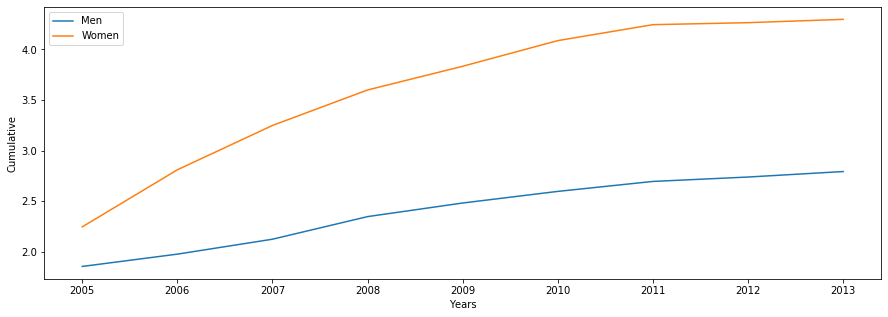

In [30]:
plt.plot(years, cumulativeMen, label = 'Men')
plt.plot(years, cumulativeWomen, label = 'Women')
plt.xlabel('Years')
plt.ylabel('Cumulative')
plt.legend()